All visualizations have been created and saved!


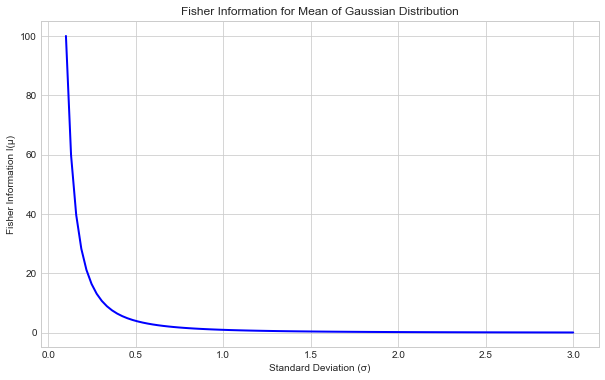

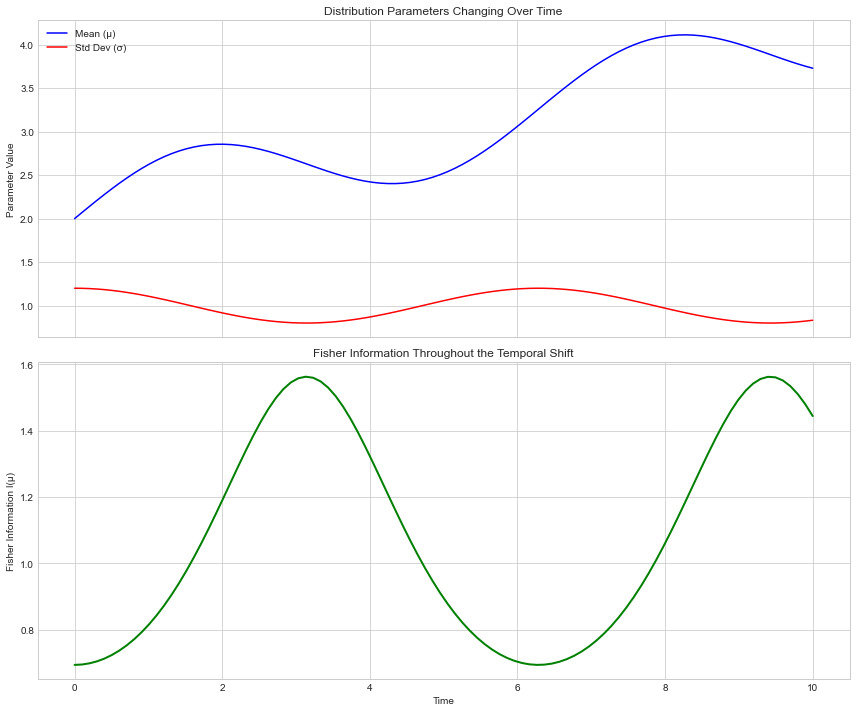

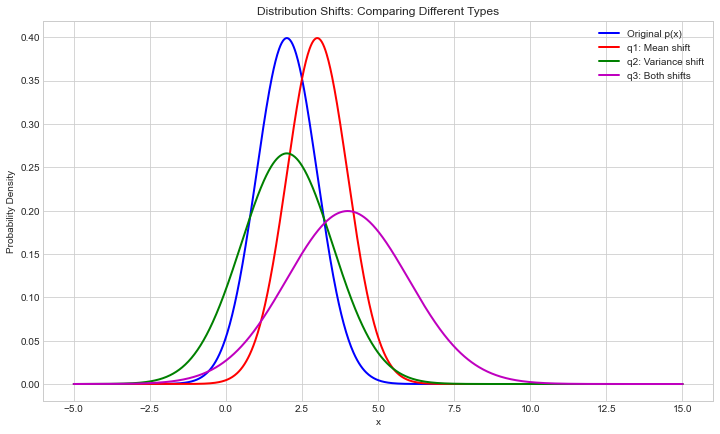

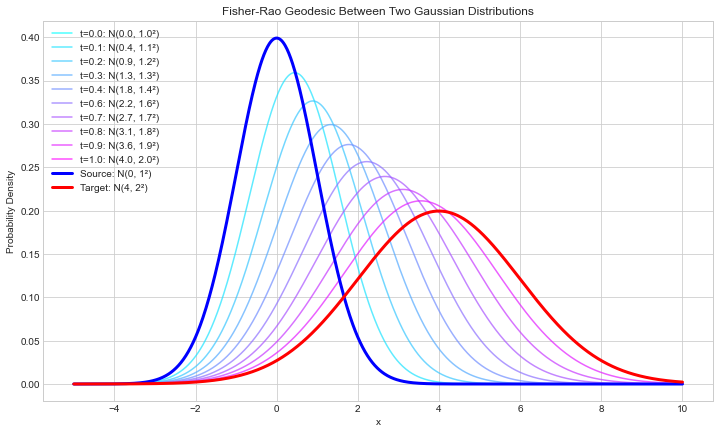

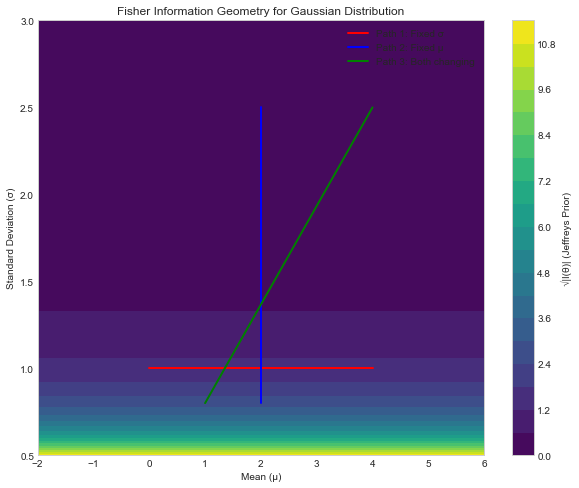

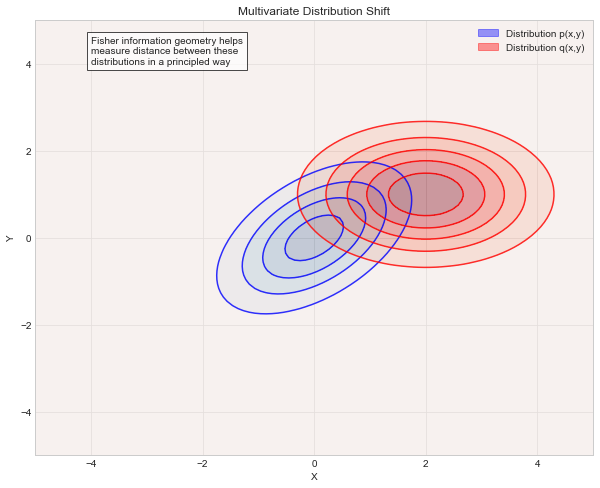

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
# import seaborn as sns
from scipy.stats import norm, multivariate_normal
from scipy.integrate import quad

plt.style.use('seaborn-whitegrid')
# sns.set_context("talk")

# For reproducibility
np.random.seed(42)

# 1. Fisher Information for a Gaussian distribution
def gaussian_fisher_info(sigma):
    """Fisher information for N(μ,σ²) with respect to μ"""
    return 1/(sigma**2)

# Create plot for Fisher information of Gaussian
sigmas = np.linspace(0.1, 3, 100)
fisher_values = [gaussian_fisher_info(sigma) for sigma in sigmas]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sigmas, fisher_values, 'b-', linewidth=2)
ax.set_xlabel('Standard Deviation (σ)')
ax.set_ylabel('Fisher Information I(μ)')
ax.set_title('Fisher Information for Mean of Gaussian Distribution')
ax.grid(True)
plt.savefig('../results/../results/gaussian_fisher_info.png', dpi=300, bbox_inches='tight')

# 2. Visualizing temporal distribution shifts and Fisher Information
# Simulate a parameter changing over time
time_points = np.linspace(0, 10, 100)
mean_trajectory = 2 + 0.5 * np.sin(time_points) + 0.2 * time_points
sigma_trajectory = 1 + 0.2 * np.cos(time_points)

# Calculate Fisher information along this trajectory
fisher_trajectory = [gaussian_fisher_info(sigma) for sigma in sigma_trajectory]

# Create plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot parameter changes
ax1.plot(time_points, mean_trajectory, 'b-', label='Mean (μ)')
ax1.plot(time_points, sigma_trajectory, 'r-', label='Std Dev (σ)')
ax1.set_ylabel('Parameter Value')
ax1.set_title('Distribution Parameters Changing Over Time')
ax1.legend()

# Plot Fisher information changes
ax2.plot(time_points, fisher_trajectory, 'g-', linewidth=2)
ax2.set_xlabel('Time')
ax2.set_ylabel('Fisher Information I(μ)')
ax2.set_title('Fisher Information Throughout the Temporal Shift')

plt.tight_layout()
plt.savefig('../results/temporal_fisher_info.png', dpi=300, bbox_inches='tight')

# 3. Comparing different divergence metrics in distribution shift detection
# Define distributions
x = np.linspace(-5, 15, 1000)
p = norm.pdf(x, loc=2, scale=1)
q1 = norm.pdf(x, loc=3, scale=1)  # Mean shift
q2 = norm.pdf(x, loc=2, scale=1.5)  # Variance shift
q3 = norm.pdf(x, loc=4, scale=2)  # Both mean and variance shift

# Plot distributions
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(x, p, 'b-', linewidth=2, label='Original p(x)')
ax.plot(x, q1, 'r-', linewidth=2, label='q1: Mean shift')
ax.plot(x, q2, 'g-', linewidth=2, label='q2: Variance shift')
ax.plot(x, q3, 'm-', linewidth=2, label='q3: Both shifts')
ax.set_xlabel('x')
ax.set_ylabel('Probability Density')
ax.set_title('Distribution Shifts: Comparing Different Types')
ax.legend()
plt.savefig('../results/distribution_shifts.png', dpi=300, bbox_inches='tight')

# 4. Fisher-Rao geodesic between two Gaussians
def plot_fisher_geodesic():
    # Parameters for source and target distributions
    mu1, sigma1 = 0, 1
    mu2, sigma2 = 4, 2
    
    # Create a geodesic path in parameter space (linear interpolation is geodesic in Fisher-Rao)
    t_values = np.linspace(0, 1, 10)
    mu_path = np.linspace(mu1, mu2, 10)
    sigma_path = np.linspace(sigma1, sigma2, 10)
    
    # Plot the distributions along the geodesic
    x = np.linspace(-5, 10, 1000)
    
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Plot all intermediate distributions with varying transparency
    for i, t in enumerate(t_values):
        dist = norm.pdf(x, loc=mu_path[i], scale=sigma_path[i])
        ax.plot(x, dist, color=cm.cool(t), alpha=0.7, 
                label=f't={t:.1f}: N({mu_path[i]:.1f}, {sigma_path[i]:.1f}²)')
    
    # Highlight start and end distributions
    ax.plot(x, norm.pdf(x, loc=mu1, scale=sigma1), 'b-', linewidth=3, label=f'Source: N({mu1}, {sigma1}²)')
    ax.plot(x, norm.pdf(x, loc=mu2, scale=sigma2), 'r-', linewidth=3, label=f'Target: N({mu2}, {sigma2}²)')
    
    ax.set_xlabel('x')
    ax.set_ylabel('Probability Density')
    ax.set_title('Fisher-Rao Geodesic Between Two Gaussian Distributions')
    ax.legend(loc='upper left')
    
    plt.savefig('../results/fisher_geodesic.png', dpi=300, bbox_inches='tight')

plot_fisher_geodesic()

# 5. Visualizing Fisher information in 2D parameter space
def plot_fisher_info_2d():
    # Create a grid of parameter values
    mu_range = np.linspace(-2, 6, 50)
    sigma_range = np.linspace(0.5, 3, 50)
    mu_grid, sigma_grid = np.meshgrid(mu_range, sigma_range)
    
    # Calculate Fisher information for each parameter combination
    # For Gaussian, the Fisher information matrix is:
    # [1/σ², 0]
    # [0, 2/σ⁴]
    fisher_matrix_det = np.zeros_like(mu_grid)
    for i in range(len(mu_range)):
        for j in range(len(sigma_range)):
            sigma = sigma_range[j]
            # Determinant of the Fisher information matrix
            fisher_matrix_det[j, i] = (1/sigma**2) * (2/sigma**4)
    
    # Plot the determinant of Fisher information
    fig, ax = plt.subplots(figsize=(10, 8))
    contour = ax.contourf(mu_grid, sigma_grid, np.sqrt(fisher_matrix_det), 
                         levels=20, cmap='viridis')
    ax.set_xlabel('Mean (μ)')
    ax.set_ylabel('Standard Deviation (σ)')
    ax.set_title('Fisher Information Geometry for Gaussian Distribution')
    cbar = plt.colorbar(contour)
    cbar.set_label('√|I(θ)| (Jeffreys Prior)')
    
    # Add some sample paths in parameter space
    # Path 1: Changing mean with fixed variance
    path1_mu = np.linspace(0, 4, 10)
    path1_sigma = np.ones_like(path1_mu)
    ax.plot(path1_mu, path1_sigma, 'r-', linewidth=2, label='Path 1: Fixed σ')
    
    # Path 2: Changing variance with fixed mean
    path2_sigma = np.linspace(0.8, 2.5, 10)
    path2_mu = 2 * np.ones_like(path2_sigma)
    ax.plot(path2_mu, path2_sigma, 'b-', linewidth=2, label='Path 2: Fixed μ')
    
    # Path 3: Changing both
    t = np.linspace(0, 1, 10)
    path3_mu = 1 + 3*t
    path3_sigma = 0.8 + 1.7*t
    ax.plot(path3_mu, path3_sigma, 'g-', linewidth=2, label='Path 3: Both changing')
    
    ax.legend(loc='upper right')
    plt.savefig('../results/fisher_info_2d.png', dpi=300, bbox_inches='tight')

plot_fisher_info_2d()

# 6. Visualizing multivariate distribution shifts
def plot_multivariate_shift():
    # Create a grid for plotting
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))
    
    # Define distributions
    dist1 = multivariate_normal(mean=[0, 0], cov=[[1, 0.5], [0.5, 1]])
    dist2 = multivariate_normal(mean=[2, 1], cov=[[1.5, 0], [0, 0.8]])
    
    # Calculate PDFs
    Z1 = dist1.pdf(pos)
    Z2 = dist2.pdf(pos)
    
    # Plot the distributions
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot contours
    contour1 = ax.contour(X, Y, Z1, levels=5, colors='blue', alpha=0.8)
    contour2 = ax.contour(X, Y, Z2, levels=5, colors='red', alpha=0.8)
    
    # Fill contours with transparency
    contourf1 = ax.contourf(X, Y, Z1, levels=5, cmap='Blues', alpha=0.4)
    contourf2 = ax.contourf(X, Y, Z2, levels=5, cmap='Reds', alpha=0.4)
    
    # Add labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Multivariate Distribution Shift')
    
    # Add custom legend
    import matplotlib.patches as mpatches
    blue_patch = mpatches.Patch(color='blue', alpha=0.4, label='Distribution p(x,y)')
    red_patch = mpatches.Patch(color='red', alpha=0.4, label='Distribution q(x,y)')
    ax.legend(handles=[blue_patch, red_patch], loc='upper right')
    
    # Add annotation about Fisher information
    ax.text(-4, 4, "Fisher information geometry helps\nmeasure distance between these\ndistributions in a principled way",
           bbox=dict(facecolor='white', alpha=0.7))
    
    plt.savefig('../results/multivariate_shift.png', dpi=300, bbox_inches='tight')

plot_multivariate_shift()

print("All visualizations have been created and saved!")